In [1]:
import os
import glob
from tqdm.auto import tqdm

In [2]:
source_folder = "../../../data/kny/raw_videos/"
output_folder = "../../../data/kny/scenes/"

In [3]:
video_paths = sorted(glob.glob(source_folder + "*.mkv"))

In [4]:
commands = []
for i, path in enumerate(video_paths):
    sub_folder_name = os.path.basename(path).split(".")[0]
    commands.append(f"scenedetect --input {path} --output {output_folder}/{sub_folder_name} --downscale 4 --min-scene-len=0.5s --drop-short-scenes --stats {sub_folder_name}.stats.csv --quiet detect-content --threshold=15 list-scenes save-images split-video")

In [5]:
for command in tqdm(commands):
    os.system(f"{command} &")

  0%|          | 0/44 [00:00<?, ?it/s]

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import skvideo.io
from ganime.visualization.images import display_images

In [84]:
video = skvideo.io.vread("../../../data/kny/scenes/01/01-Scene-035.mp4")

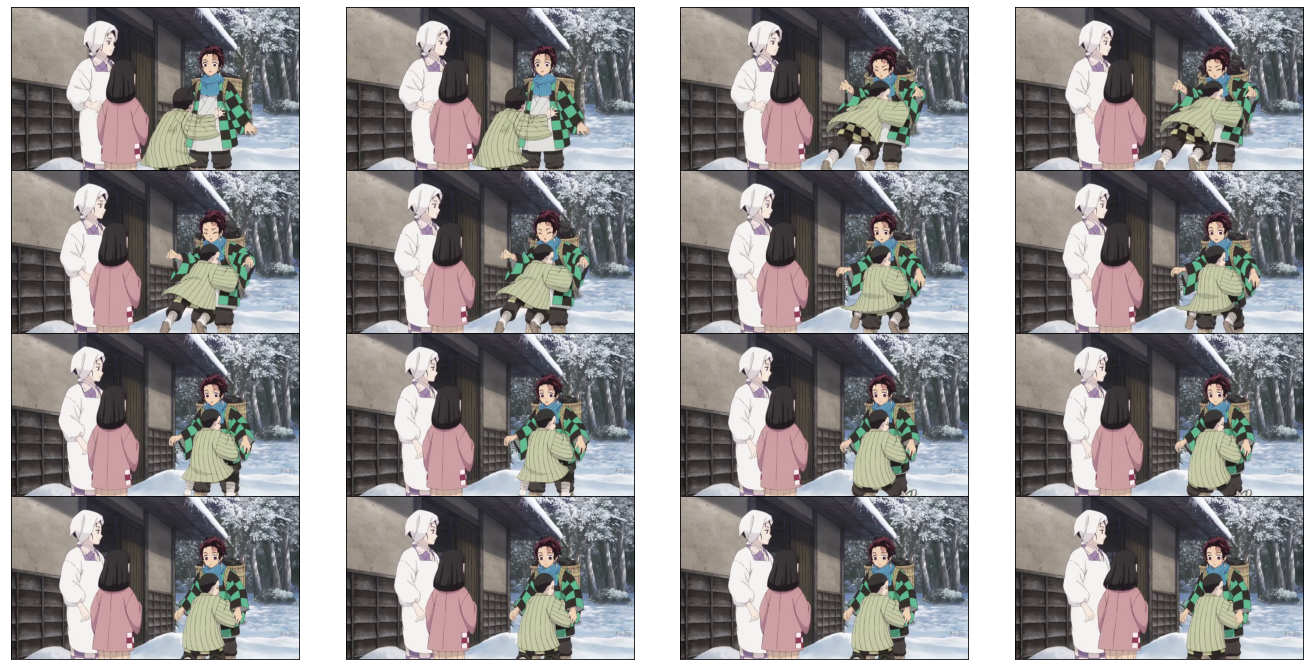

In [85]:
display_images(video, n_rows=4, n_cols=4)
print()

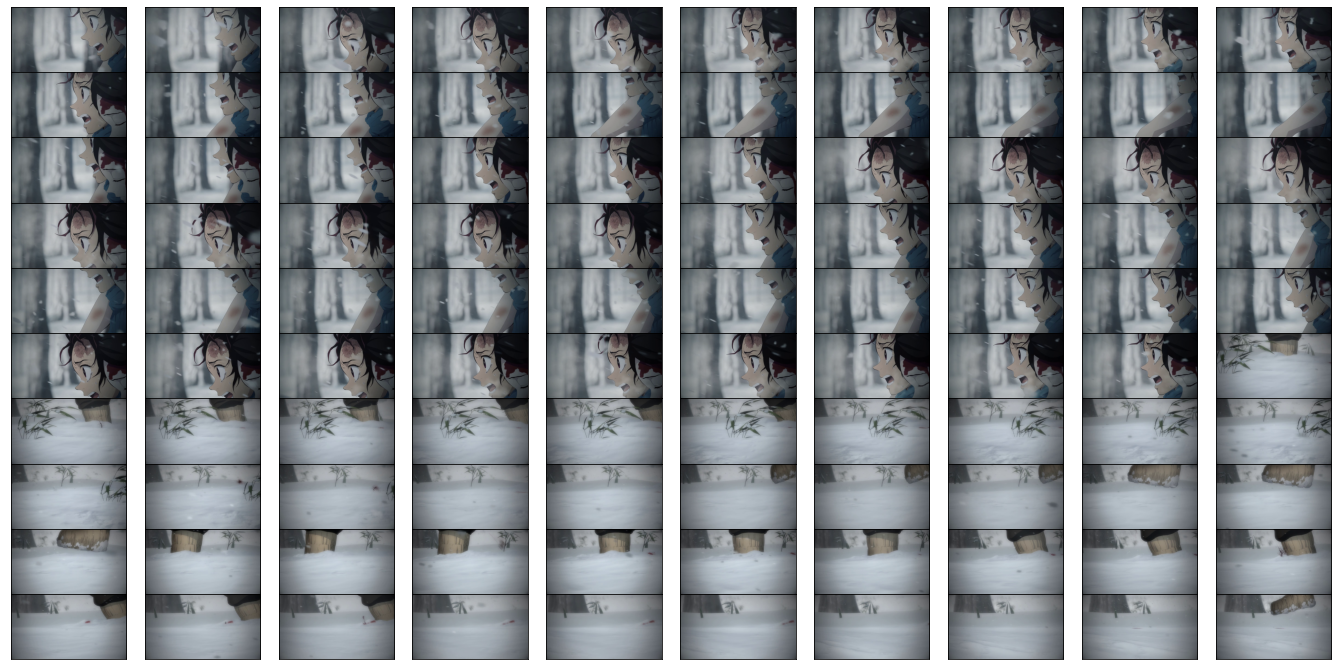

In [24]:
display_images(video[470:], n_rows=10, n_cols=10)
print()

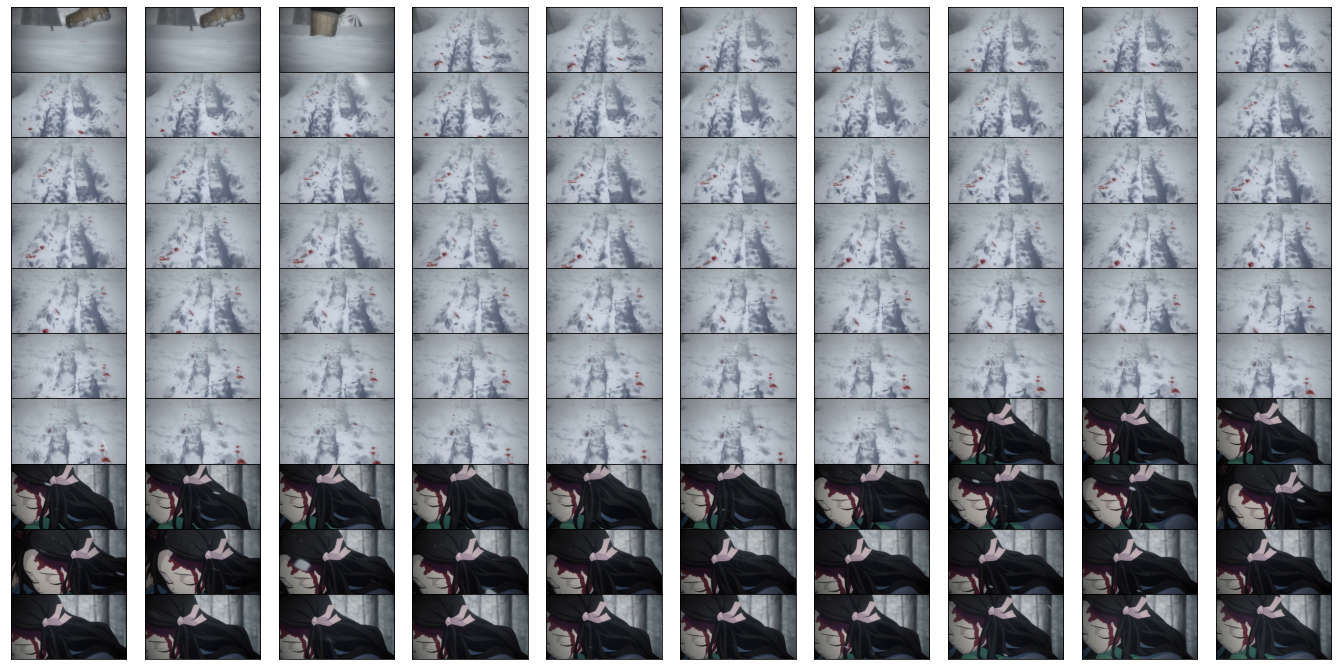

In [25]:
display_images(video[570:], n_rows=10, n_cols=10)
print()

In [36]:
import numpy as np

def get_value_to_split(
    video: np.ndarray, min_ideal_length: int, max_ideal_length: int
) -> int:
    n_elements = video.shape[0]

    lowest_remainder = max_ideal_length
    lowest_id = max_ideal_length
    for i in range(min_ideal_length, max_ideal_length):
        remainder = n_elements % i
        if remainder <= lowest_remainder:
            lowest_id = i
            lowest_remainder = remainder
    return lowest_id

def cut_long_video(video, length):
    n_splits = video.shape[0] // length
    if n_splits == 0:
        yield video
    else:
        for i in range(n_splits):
            start = i * length
            end = (i + 1) * length
            if video.shape[0] - end < length:
                end = video.shape[0]
            yield video[start:end]

In [53]:
for i in range(100, 110):
    print("#", i, "#")
    array = np.arange(i)
    for video_split in cut_long_video(
            array, get_value_to_split(array, 15, 25)
        ):
            print("\t", len(video_split))

# 100 #
	 20
	 20
	 20
	 20
	 20
# 101 #
	 20
	 20
	 20
	 20
	 21
# 102 #
	 17
	 17
	 17
	 17
	 17
	 17
# 103 #
	 17
	 17
	 17
	 17
	 17
	 18
# 104 #
	 17
	 17
	 17
	 17
	 17
	 19
# 105 #
	 21
	 21
	 21
	 21
	 21
# 106 #
	 21
	 21
	 21
	 21
	 22
# 107 #
	 21
	 21
	 21
	 21
	 23
# 108 #
	 18
	 18
	 18
	 18
	 18
	 18
# 109 #
	 18
	 18
	 18
	 18
	 18
	 19
